# Part 2a

In [1]:
import pandas as pd
results_file = 'data/results-2a.csv'
df = pd.read_csv(results_file)
df.head()

,timestamp,cluster_name,benchmark,interference,real_ms,user_ms,sys_ms
0,2023-03-28 17:23:16.356185,part2a.k8s.local,blackscholes,none,863,836,4
1,2023-03-28 17:23:28.173569,part2a.k8s.local,blackscholes,cpu,1106,1029,8
2,2023-03-28 17:51:08.061604,part2a.k8s.local,blackscholes,l1d,1038,1025,4
3,2023-03-28 17:51:52.791042,part2a.k8s.local,blackscholes,l1i,1329,1258,16
4,2023-03-28 17:52:36.247173,part2a.k8s.local,blackscholes,l2,1027,1004,16


In [2]:
for index, row in df.iterrows():
    benchmark = row['benchmark']
    interference = row['interference']
    if interference == 'none':
        df.loc[index, 'baseline_ms'] = row['real_ms']
    else:
        df.loc[index, 'baseline_ms'] = df[(df['benchmark'] == benchmark) & (df['interference'] == 'none')]['real_ms'].iloc[0]

df.head()

,timestamp,cluster_name,benchmark,interference,real_ms,user_ms,sys_ms,baseline_ms
0,2023-03-28 17:23:16.356185,part2a.k8s.local,blackscholes,none,863,836,4,863.0
1,2023-03-28 17:23:28.173569,part2a.k8s.local,blackscholes,cpu,1106,1029,8,863.0
2,2023-03-28 17:51:08.061604,part2a.k8s.local,blackscholes,l1d,1038,1025,4,863.0
3,2023-03-28 17:51:52.791042,part2a.k8s.local,blackscholes,l1i,1329,1258,16,863.0
4,2023-03-28 17:52:36.247173,part2a.k8s.local,blackscholes,l2,1027,1004,16,863.0


In [3]:
df['relative_ms'] = round(df['real_ms'] / df['baseline_ms'], 2)
df.head()

,timestamp,cluster_name,benchmark,interference,real_ms,user_ms,sys_ms,baseline_ms,relative_ms
0,2023-03-28 17:23:16.356185,part2a.k8s.local,blackscholes,none,863,836,4,863.0,1.00
1,2023-03-28 17:23:28.173569,part2a.k8s.local,blackscholes,cpu,1106,1029,8,863.0,1.28
2,2023-03-28 17:51:08.061604,part2a.k8s.local,blackscholes,l1d,1038,1025,4,863.0,1.20
3,2023-03-28 17:51:52.791042,part2a.k8s.local,blackscholes,l1i,1329,1258,16,863.0,1.54
4,2023-03-28 17:52:36.247173,part2a.k8s.local,blackscholes,l2,1027,1004,16,863.0,1.19


In [4]:
df_pivot = df.pivot(index='benchmark', columns='interference', values='relative_ms')
ALL_INTERFERENCES = ['none', 'cpu', 'l1d', 'l1i', 'l2', 'llc', 'membw']
df_pivot = df_pivot[ALL_INTERFERENCES]
df_pivot

interference,none,cpu,l1d,l1i,l2,llc,membw
benchmark,,,,,,,
blackscholes,1.0,1.28,1.20,1.54,1.19,1.48,1.34
canneal,1.0,1.08,1.12,1.25,1.09,1.75,1.20
dedup,1.0,1.75,1.23,2.11,1.23,2.16,1.66
ferret,1.0,2.78,1.04,2.26,1.01,2.61,2.07
freqmine,1.0,1.93,0.97,1.98,0.99,1.74,1.52
radix,1.0,1.06,1.08,1.10,1.14,1.51,1.09
vips,1.0,1.78,1.54,1.93,1.58,1.95,1.67


# Part 2b

In [13]:
import pandas as pd
results_file = 'data/results-2b.csv'
df = pd.read_csv(results_file)
df.head() 

,timestamp,cluster_name,benchmark,n_threads,real_ms,user_ms,sys_ms
0,2023-03-31 15:06:11.347473,part2b.k8s.local,blackscholes,1,125756,124882,852
1,2023-03-31 15:07:32.961416,part2b.k8s.local,blackscholes,2,73094,125191,920
2,2023-03-31 15:08:27.573944,part2b.k8s.local,blackscholes,4,46271,125020,740
3,2023-03-31 15:09:12.161363,part2b.k8s.local,blackscholes,8,36254,147158,823
4,2023-03-31 15:13:34.080376,part2b.k8s.local,canneal,1,255125,254340,736


In [15]:
df = df.groupby(['cluster_name', 'benchmark', 'n_threads']).mean().reset_index()
df

,cluster_name,benchmark,n_threads,real_ms,user_ms,sys_ms
0,part2b.k8s.local,blackscholes,1,126321.000000,125018.333333,1276.000000
1,part2b.k8s.local,blackscholes,2,73555.333333,125620.000000,1156.000000
2,part2b.k8s.local,blackscholes,4,46495.666667,125485.666667,800.000000
3,part2b.k8s.local,blackscholes,8,36476.666667,149017.333333,880.333333
4,part2b.k8s.local,canneal,1,299194.666667,298197.333333,929.000000
5,part2b.k8s.local,canneal,2,184409.333333,306514.333333,1111.333333
6,part2b.k8s.local,canneal,4,125791.333333,305875.666667,1414.666667
7,part2b.k8s.local,canneal,8,100427.666667,334774.666667,1546.666667
8,part2b.k8s.local,dedup,1,20060.333333,24504.333333,5466.666667
9,part2b.k8s.local,dedup,2,12429.333333,25372.333333,5348.666667


In [16]:
for index, row in df.iterrows():
    benchmark = row['benchmark']
    n_threads = row['n_threads']
    if n_threads == 1:
        df.loc[index, 'baseline_ms'] = row['real_ms']
    else:
        df.loc[index, 'baseline_ms'] = df[(df['benchmark'] == benchmark) & (df['n_threads'] == 1)]['real_ms'].iloc[0]

df.head()

,cluster_name,benchmark,n_threads,real_ms,user_ms,sys_ms,baseline_ms
0,part2b.k8s.local,blackscholes,1,126321.000000,125018.333333,1276.000000,126321.000000
1,part2b.k8s.local,blackscholes,2,73555.333333,125620.000000,1156.000000,126321.000000
2,part2b.k8s.local,blackscholes,4,46495.666667,125485.666667,800.000000,126321.000000
3,part2b.k8s.local,blackscholes,8,36476.666667,149017.333333,880.333333,126321.000000
4,part2b.k8s.local,canneal,1,299194.666667,298197.333333,929.000000,299194.666667


In [17]:
df['speedup'] = df['baseline_ms'] / df['real_ms']
df

,cluster_name,benchmark,n_threads,real_ms,user_ms,sys_ms,baseline_ms,speedup
0,part2b.k8s.local,blackscholes,1,126321.000000,125018.333333,1276.000000,126321.000000,1.000000
1,part2b.k8s.local,blackscholes,2,73555.333333,125620.000000,1156.000000,126321.000000,1.717360
2,part2b.k8s.local,blackscholes,4,46495.666667,125485.666667,800.000000,126321.000000,2.716834
3,part2b.k8s.local,blackscholes,8,36476.666667,149017.333333,880.333333,126321.000000,3.463063
4,part2b.k8s.local,canneal,1,299194.666667,298197.333333,929.000000,299194.666667,1.000000
5,part2b.k8s.local,canneal,2,184409.333333,306514.333333,1111.333333,299194.666667,1.622449
6,part2b.k8s.local,canneal,4,125791.333333,305875.666667,1414.666667,299194.666667,2.378500
7,part2b.k8s.local,canneal,8,100427.666667,334774.666667,1546.666667,299194.666667,2.979206
8,part2b.k8s.local,dedup,1,20060.333333,24504.333333,5466.666667,20060.333333,1.000000
9,part2b.k8s.local,dedup,2,12429.333333,25372.333333,5348.666667,20060.333333,1.613951


In [18]:
benchmarks = list(df['benchmark'].unique())
benchmarks

['blackscholes', 'canneal', 'dedup', 'ferret', 'freqmine', 'radix', 'vips']

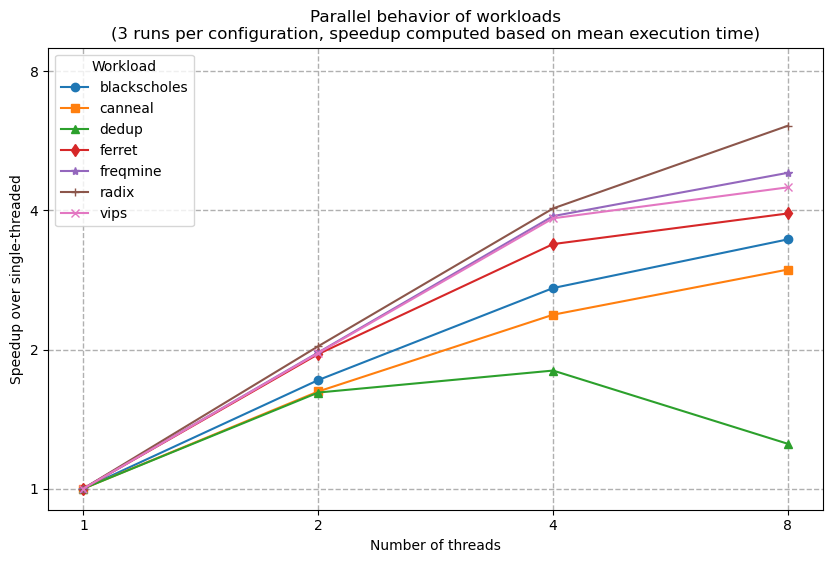

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from cycler import cycler


marker_cycler = cycler(
    color=[
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ],
    marker=['o', 's', '^', 'd', '*', '+', 'x', 'v', 'p', 'h'])


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_prop_cycle(marker_cycler)
for benchmark in benchmarks:
    speedup_df = df[df['benchmark'] == benchmark]
    ax.plot(speedup_df['n_threads'], speedup_df['speedup'], label=benchmark, markersize=6)

ax.set_xlabel('Number of threads')
ax.set_xscale('log', base=2)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

ax.set_yscale('log', base=2)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

ax.set_ylim(.9, 9)

ax.set_ylabel('Speedup over single-threaded')


ax.set_title('Parallel behavior of workloads\n(3 runs per configuration, speedup computed based on mean execution time)')
ax.grid(linestyle='--', linewidth=1)
ax.legend(title='Workload')
plt.show()
fig.savefig('figures/plot-2b.pdf', bbox_inches='tight')